In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree

In [43]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [45]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [47]:
#Shape
shape = df.shape
print("Number of Samples:", shape[0])
print("Number of Features:", shape[1])

Number of Samples: 500
Number of Features: 9


In [49]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [51]:
df = df.drop('Serial No.',axis=1)

In [53]:
df.shape

(500, 8)

In [55]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [57]:
df.head

<bound method NDFrame.head of      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit   
0                0.92

In [59]:
# Step 1: Use the 75th percentile to convert 'Chance of Admit ' to binary (0 or 1)
threshold = df['Chance of Admit '].describe()['75%']
df['Admitted'] = (df['Chance of Admit '] >= threshold).astype(int)

# Drop the original 'Chance of Admit ' column as it's now converted
df = df.drop(['Chance of Admit '], axis=1)

# Check for class imbalance
admitted_counts = df['Admitted'].value_counts()

# Display the threshold used and the class distribution
threshold, admitted_counts

(0.82,
 Admitted
 0    367
 1    133
 Name: count, dtype: int64)

In [61]:
# Check the current class distribution
admitted_counts = df['Admitted'].value_counts()

# Separate the majority and minority classes based on the current distribution
df_majority = df[df['Admitted'] == 0]  # Not Admitted
df_minority = df[df['Admitted'] == 1]  # Admitted

# Upsample the minority class (Admitted) to match the size of the majority class (Not Admitted)
df_minority_upsampled = resample(df_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples=len(df_majority),  # to match the majority class
                                 random_state=42)   # reproducible results

# Combine the majority class with the upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Check the new class distribution
balanced_counts = df_balanced['Admitted'].value_counts()
balanced_counts


Admitted
0    367
1    367
Name: count, dtype: int64

In [63]:
x = df[['GRE Score','University Rating','CGPA']]

y = df['Admitted']

# Drop columns from the balanced dataset except the specified features in x and the target y
df_balanced = df_balanced[['GRE Score', 'University Rating', 'CGPA', 'Admitted']]

# Display the first few rows of the modified balanced DataFrame
df_balanced.head()

,GRE Score,University Rating,CGPA,Admitted
1,324,4,8.87,0
2,316,3,8.00,0
3,322,3,8.67,0
4,314,2,8.21,0
6,321,3,8.20,0


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=14)

In [15]:
print(f"Size of splitted data")
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"y_train {x_test.shape}")
print(f"y_test {y_test.shape}")

Size of splitted data
x_train (375, 3)
y_train (375,)
y_train (125, 3)
y_test (125,)


In [65]:
# Function to train and evaluate with additional parameters to control tree size
def train_and_evaluate_pruned(criterion, x_train, y_train, x_test, y_test):
    # Adjusting parameters to prune the tree
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=4,               
        min_samples_split=10,      
        min_samples_leaf=5,        
        random_state=14
    )
    model.fit(x_train, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluation metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    train_report = classification_report(y_train, y_train_pred)

    # Evaluation metrics for testing data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)

    return {
        "criterion": criterion,
        "model": model,
        "train_accuracy": train_accuracy,
        "train_conf_matrix": train_conf_matrix,
        "train_report": train_report,
        "test_accuracy": test_accuracy,
        "test_conf_matrix": test_conf_matrix,
        "test_report": test_report,
    }

# Function to display the results of the model evaluation
def display_results(results):
    print(f"Results for {results['criterion']} criterion:")
    print(f"Training Accuracy: {results['train_accuracy']:.4f}")
    print("Training Confusion Matrix:")
    print(results['train_conf_matrix'])
    print("Training Classification Report:")
    print(results['train_report'])
    print(f"Testing Accuracy: {results['test_accuracy']:.4f}")
    print("Testing Confusion Matrix:")
    print(results['test_conf_matrix'])
    print("Testing Classification Report:")
    print(results['test_report'])
    print("\n")

# Function to plot the decision tree
def plot_decision_tree(model, feature_names, class_names):
    plt.figure(figsize=(20, 12))  # Increased figure size for better visibility
    plot_tree(model, 
              feature_names=feature_names, 
              class_names=class_names, 
              filled=True, 
              rounded=True, 
              proportion=True)
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))  # Adjust figure size
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.show()

# Assuming you have feature names and class names:
feature_names = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
class_names = ['Not Admitted', 'Admitted']

Results for gini criterion:
Training Accuracy: 0.9467
Training Confusion Matrix:
[[271   8]
 [ 12  84]]
Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       279
           1       0.91      0.88      0.89        96

    accuracy                           0.95       375
   macro avg       0.94      0.92      0.93       375
weighted avg       0.95      0.95      0.95       375

Testing Accuracy: 0.9360
Testing Confusion Matrix:
[[82  6]
 [ 2 35]]
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        88
           1       0.85      0.95      0.90        37

    accuracy                           0.94       125
   macro avg       0.91      0.94      0.93       125
weighted avg       0.94      0.94      0.94       125





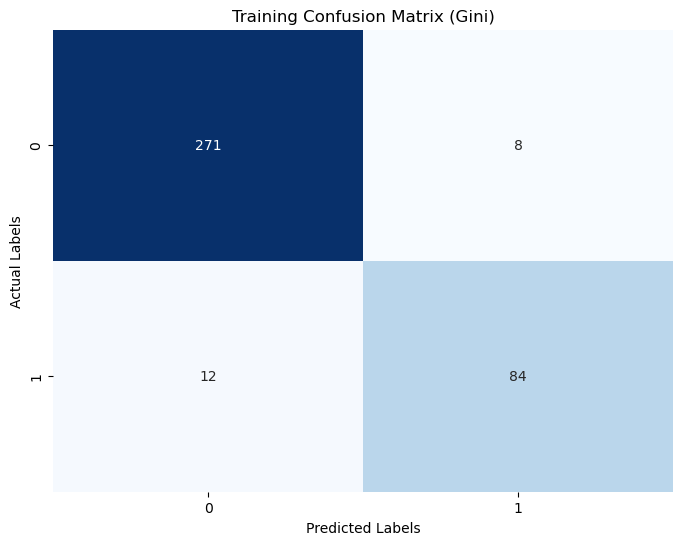

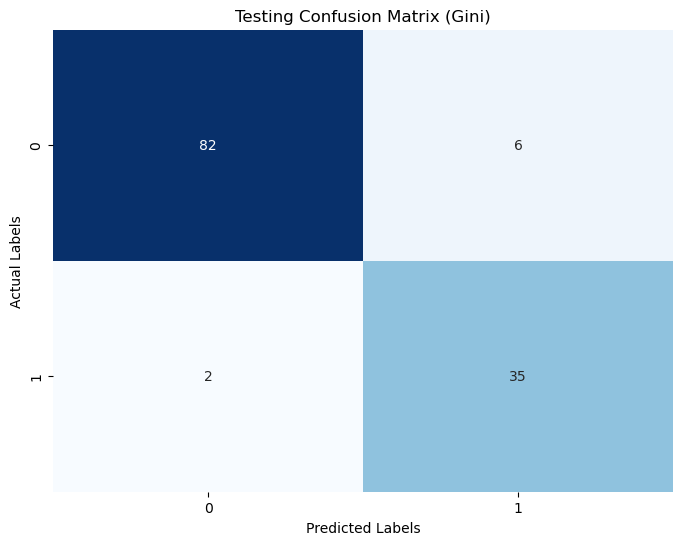

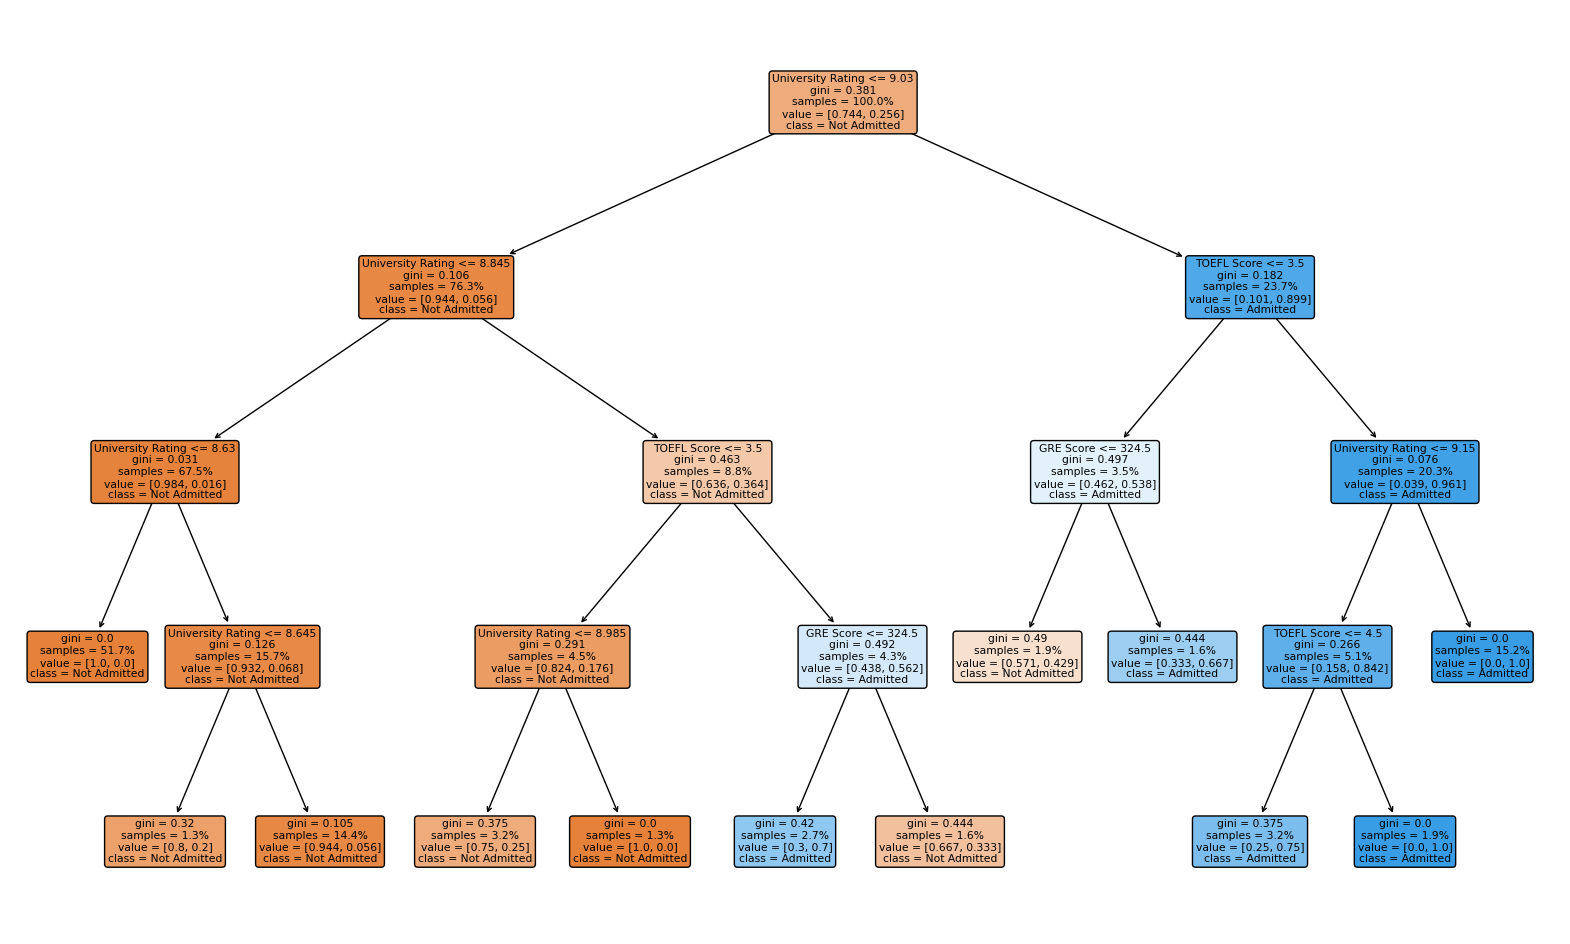

In [67]:
# Train and evaluate the pruned Decision Tree using Gini index
pruned_gini_results = train_and_evaluate_pruned('gini', x_train, y_train, x_test, y_test)

# Display results for the pruned Gini index tree
display_results(pruned_gini_results)

# Plot confusion matrices for the Gini-based model
plot_confusion_matrix(pruned_gini_results['train_conf_matrix'], "Training Confusion Matrix (Gini)")
plot_confusion_matrix(pruned_gini_results['test_conf_matrix'], "Testing Confusion Matrix (Gini)")

# Plot decision tree for Gini-based model
plot_decision_tree(pruned_gini_results['model'], feature_names, class_names)

Results for entropy criterion:
Training Accuracy: 0.9360
Training Confusion Matrix:
[[262  17]
 [  7  89]]
Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       279
           1       0.84      0.93      0.88        96

    accuracy                           0.94       375
   macro avg       0.91      0.93      0.92       375
weighted avg       0.94      0.94      0.94       375

Testing Accuracy: 0.9360
Testing Confusion Matrix:
[[80  8]
 [ 0 37]]
Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        88
           1       0.82      1.00      0.90        37

    accuracy                           0.94       125
   macro avg       0.91      0.95      0.93       125
weighted avg       0.95      0.94      0.94       125





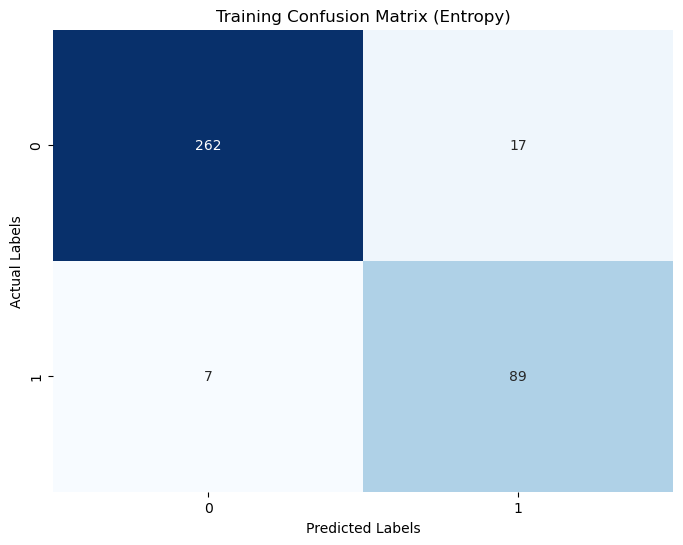

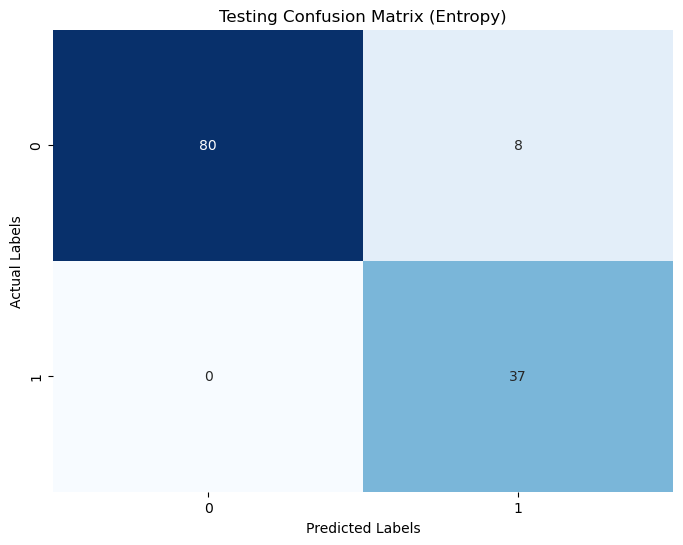

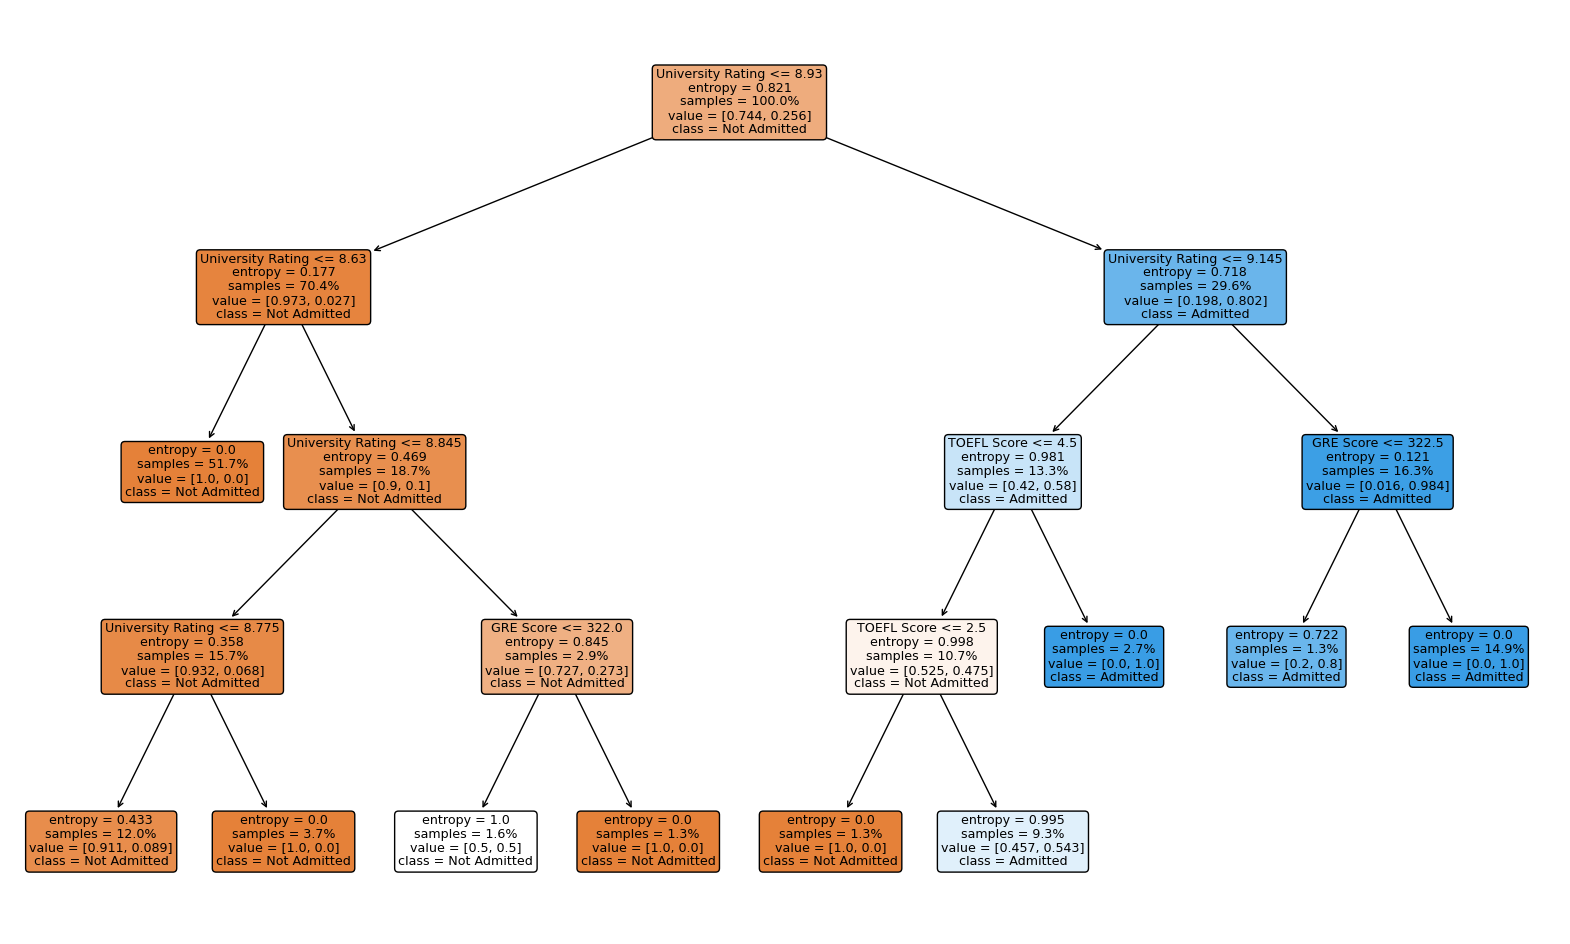

In [18]:
# Train and evaluate the pruned Decision Tree using Entropy
pruned_entropy_results = train_and_evaluate_pruned('entropy', x_train, y_train, x_test, y_test)

# Display results for the pruned Entropy tree
display_results(pruned_entropy_results)

# Plot confusion matrices for the Entropy-based model
plot_confusion_matrix(pruned_entropy_results['train_conf_matrix'], "Training Confusion Matrix (Entropy)")
plot_confusion_matrix(pruned_entropy_results['test_conf_matrix'], "Testing Confusion Matrix (Entropy)")

# Plot decision tree for Entropy-based model
plot_decision_tree(pruned_entropy_results['model'], feature_names, class_names)
